In [1]:
from tqdm.notebook import tqdm

import era5
from era5.model import FourierRegression, evaluate_ft

%matplotlib inline

In [2]:
variable = era5.WindSpeed()

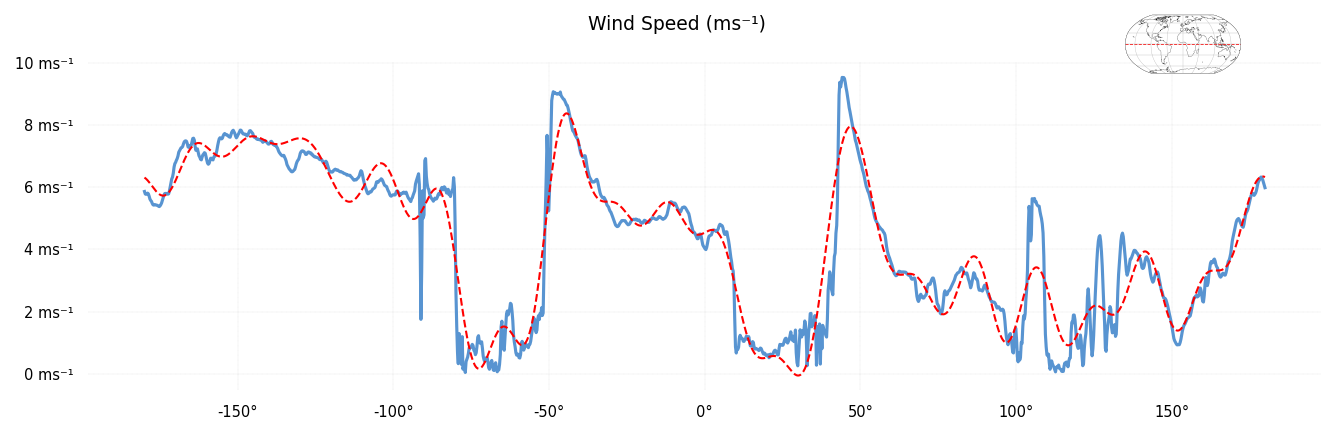


        Fourier Regression 1D:
            Data stdev: 2.4264 ms⁻¹
            MAE: 0.5400 ms⁻¹
            RMSE: 0.7637 ms⁻¹
            
            Input size: 2.81 KiBs
            Model size: 83.00 bytes
            Size Ratio: 2.88%
            
            Frequencies: 33
            Original size: 423.52 GiBs
            Compressed size: 12.21 GiBs
        


In [3]:
idx = ["TAVG-01-01 00:00", 1000, 0]
model = FourierRegression(variable, idx, quantile=0.98)
model.fft()

plot = era5.plot(variable, idx)
plot.plot(color="#5894d1")
plot.plot(model.predict(), color="red", linestyle="--", linewidth=1)
plot.show()

model.describe()


    Data stdev: 2.6196 ms⁻¹
    Data range: 0.000 to 15.670 ms⁻¹ (15.6699 ms⁻¹)
    
    R: 0.9544
    R²: 0.9108
    MAE: 0.5219 ms⁻¹
    RMSE: 0.7823 ms⁻¹
    
    MAPE: 28.194%
    wMAPE: 12.182%
    SMAPE: 9.750%
    
    Original size: 423.52 GiBs
    Compressed size: 11.75 GiBs
    


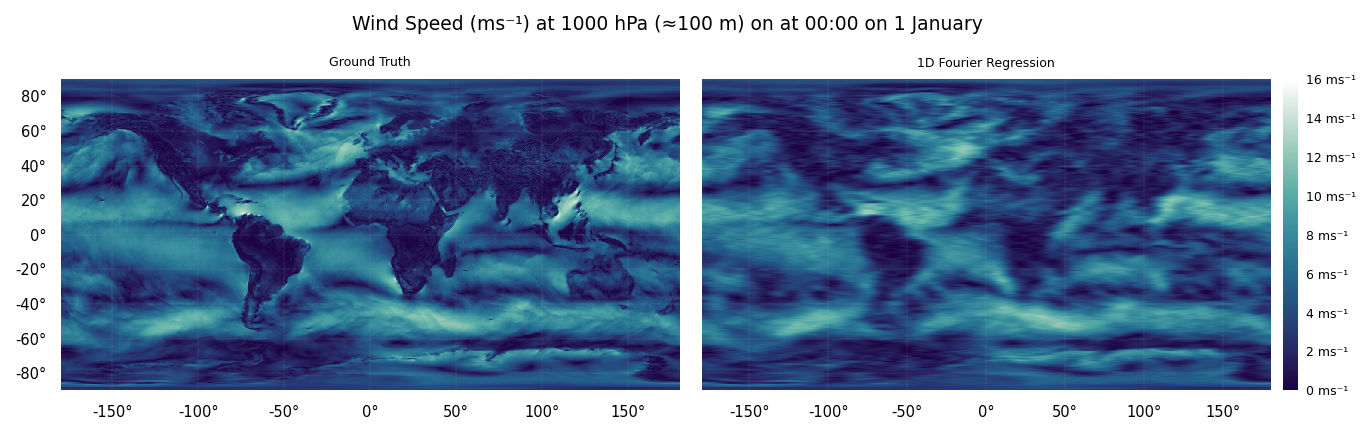

In [4]:
idx = ["TAVG-01-01 00:00", 1000]
models = [FourierRegression(variable, [*idx, lat], quantile=0.98) for lat in variable[*idx]["latitude"]]

prediction = evaluate_ft(models)

fig = era5.MetFigure(cols=2, sharey=True, sharex=True)

plot = era5.plot(variable, idx, axes=fig[0])
plot.plot(colorbar=False)
plot.set_ax_title("Ground Truth")

plot = era5.plot(variable, idx, axes=fig[1])
plot.plot(prediction)
plot.set_ax_title("1D Fourier Regression")

plot.show()

In [5]:
time = "TAVG-01-01 00:00"
models = [FourierRegression(variable, [time, lev, lat], quantile=0.98) for lev in tqdm(variable[time]["level"]) for lat in variable[time]["latitude"]]

_ = evaluate_ft(models)

  0%|          | 0/25 [00:00<?, ?it/s]


    Data stdev: 9.1880 ms⁻¹
    Data range: 0.000 to 81.405 ms⁻¹ (81.4046 ms⁻¹)
    
    R: 0.9971
    R²: 0.9943
    MAE: 0.4741 ms⁻¹
    RMSE: 0.6953 ms⁻¹
    
    MAPE: 13.722%
    wMAPE: 4.974%
    SMAPE: 5.198%
    
    Original size: 423.52 GiBs
    Compressed size: 11.53 GiBs
    
